# Applied Data Analysis: Movies
This project analyzes the key factors influencing box-office success for films released between 1914 and 2016, seeking to understand how audience preferences and industry trends have evolved over time.

We will work with two datasets:
- CMU Movie Summary
- IMDb dataset

## Loading the Datasets

In [170]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
from collections import Counter
import os
import sys

from importlib import reload
import src.utils.utils
reload(src.utils.utils)
from src.utils.utils import top_n_by_interval, top_n_total_revenue, top_n_average_rating

In [155]:
data_folder = './data/'
pickle_folder = data_folder + 'pickle/'
imdb_folder = data_folder + 'IMDB/'
cmu_folder = data_folder + 'CMU/'

In [156]:
## Load the data

with open(pickle_folder + 'movies_clean.p', 'rb') as f:
    movie_data = pickle.load(f)

with open(pickle_folder + 'characters_clean.p', 'rb') as f:
    character_data = pickle.load(f)

In [157]:
movie_data

,Wikipedia_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_languages_(Freebase_ID:name_tuples),Movie_countries_(Freebase_ID:name_tuples),Movie_genres_(Freebase_ID:name_tuples),Year,Year_Interval
0,975900,Ghosts of Mars,2001-08-24,14010832.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,1995-2015
1,3196793,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,1995-2015
2,28463795,Brun bitter,1988,NaN,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,1975-1995
3,9363483,White Of The Eye,1987,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,1975-1995
4,261236,A Woman in Flames,1983,NaN,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,1975-1995
...,...,...,...,...,...,...,...,...,...
81736,35228177,Mermaids: The Body Found,2011-03-19,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011,1995-2015
81737,34980460,Knuckle,2011-01-21,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,1995-2015
81738,9971909,Another Nice Mess,1972-09-22,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,1955-1975
81739,913762,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,1975-1995


In [158]:
character_data

,Wikipedia_movie_ID,Actor_date_of_birth,Actor_gender,Actor_name,Actor_age_at_movie_release,Movie_name,Movie_release_date,Movie_box_office_revenue,Year,Year_Interval,averageRating,numVotes,release_season,gender_F,gender_M,Year_of_birth,Age_Interval
0,975900.0,1958-08-26,F,Wanda De Jesus,43.0,Ghosts of Mars,2001-08-24,14010832.0,2001.0,1995-2015,4.9,58585.0,Summer,True,False,1958.0,Experimented Actor(30-60)
1,975900.0,1974-08-15,F,Natasha Henstridge,27.0,Ghosts of Mars,2001-08-24,14010832.0,2001.0,1995-2015,4.9,58585.0,Summer,True,False,1974.0,Young Actor(19-30)
2,975900.0,1969-06-15,M,Ice Cube,32.0,Ghosts of Mars,2001-08-24,14010832.0,2001.0,1995-2015,4.9,58585.0,Summer,False,True,1969.0,Experimented Actor(30-60)
3,975900.0,1967-09-12,M,Jason Statham,34.0,Ghosts of Mars,2001-08-24,14010832.0,2001.0,1995-2015,4.9,58585.0,Summer,False,True,1967.0,Experimented Actor(30-60)
4,975900.0,1977-09-25,F,Clea DuVall,24.0,Ghosts of Mars,2001-08-24,14010832.0,2001.0,1995-2015,4.9,58585.0,Summer,True,False,1977.0,Young Actor(19-30)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271650,913762.0,1954,M,Sonny Byrkett,38.0,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,1992.0,1975-1995,NaN,NaN,Spring,False,True,1954.0,Experimented Actor(30-60)
271651,913762.0,1954,M,Sonny Byrkett,38.0,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,1992.0,1975-1995,NaN,NaN,Spring,False,True,1954.0,Experimented Actor(30-60)
271652,913762.0,1958,F,Susan Byrkett,34.0,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,1992.0,1975-1995,NaN,NaN,Spring,True,False,1958.0,Experimented Actor(30-60)
271654,913762.0,1970-05,F,Dorothy Elias-Fahn,22.0,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,1992.0,1975-1995,NaN,NaN,Spring,True,False,1970.0,Young Actor(19-30)


# 1. Data Analysis

Firstly, we perform an exploratory data analysis. We focus on a variety of characteristics - such as genre, release time, translations, and lead actors' age and gender - to determine their impact on a film's revenue. By examining five historical periods, we trace how these factors’ influence on box-office success has evolved, reflecting broader societal, political, and historical changes.

## 1.1 Analysis per Year

We start by analyzing the number of films and box-office revenues over the entire study period to understand how the role of movie productions has evolved over time.

### 1.1.1  Number of movies per Year

Firstly, we can observe that the number of movies has increased over the years,suggesting a growth of film production worldwide.

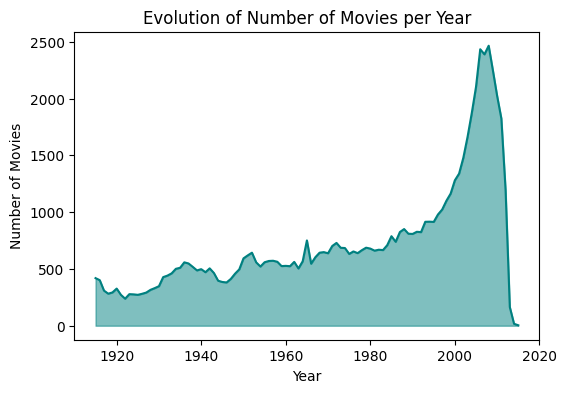

In [159]:
md_number = movie_data.copy()
movies_per_year = md_number['Year'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.plot(movies_per_year.index, movies_per_year.values, linestyle='-', color='teal')
plt.fill_between(movies_per_year.index, movies_per_year.values, color='teal', alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Evolution of Number of Movies per Year")
plt.show()

### 1.1.2 Box Office Revenue per Year

In this section, the plot shows the evolution of mean box office revenue over the years. The black line represents the mean revenue over time, while the shaded blue area indicates the variability or spread around this mean. 

Initially, from 1915 to around 1950, box office revenue remains relatively low and stable. Starting in the 1950s, however, we observe a gradual upward trend, reflecting increased box office revenue, likely driven by the growing popularity of cinema, advancements in film production, and the post-war economic boom. 

From the 1970s onward, the revenue shows more pronounced growth, with increased variability. Indeed, this period corresponds to changes in distribution methods and the impact of global markets. The trend indicates that while the film industry has become more profitable over time, it has also become more volatile, suggesting some films achieving massive box office success while others underperform.

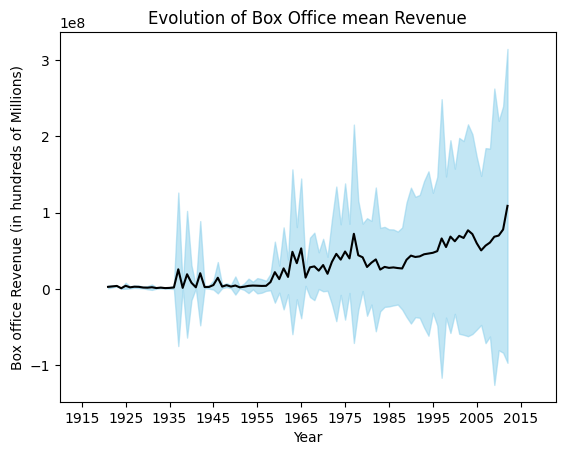

In [160]:
## Calculate the average and standard deviation of the box office revenue per year

stats_per_year = md_number.groupby(by='Year')['Movie_box_office_revenue'].agg(
    average='mean',
    std_dev='std'
).dropna()

ax = stats_per_year.average.plot(xlim=(1910,2023),xticks=range(1895,2023,10),title='Evolution of Box Office mean Revenue',ylabel='Box office Revenue (in hundreds of Millions)',color='black')
plt.fill_between(stats_per_year.index, stats_per_year.average - stats_per_year.std_dev,
                 stats_per_year.average + stats_per_year.std_dev, alpha = 0.5, color = 'skyblue')

## 1.2 Analysis per Country

In this section, we analyze the number of movies, box-office revenues, and film ratings by country to understand cultural preferences, evaluate the impact of international markets, detect success disparities, observe the evolution of the global film industry, and identify the factors that contribute to a film's success.

In [161]:
with open(pickle_folder + 'movies_countries_exploded.p', 'rb') as f:
    md_countries = pickle.load(f)

### 1.2.1 Number of Movies per Country

The United States of America leads by a significant margin, with over 30,000 movies, far surpassing other countries. India follows, but with much lower numbers, while the United Kingdom, France, and Italy are also prominent.

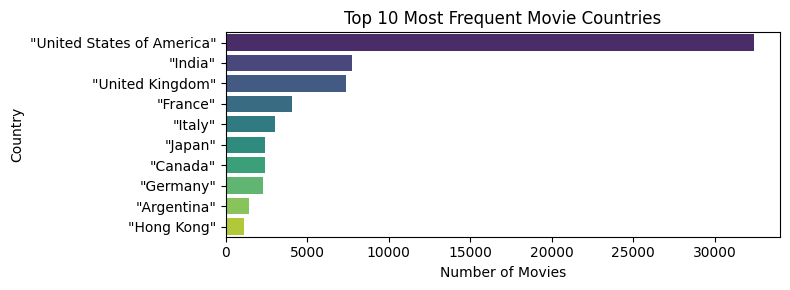

In [162]:
top_countries = md_countries.value_counts('Countries').head(10)

plt.figure(figsize=(8, 3))
sns.barplot(y=top_countries.index, x=top_countries.values, palette="viridis",hue=top_countries.index)
plt.title('Top 10 Most Frequent Movie Countries')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

Additionally, we analyze the 10 most frequent countries in film production over a 20-year interval:

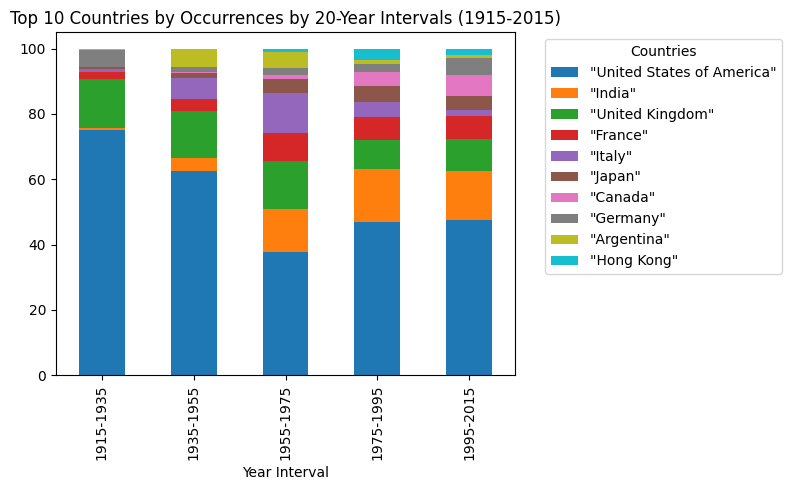

In [163]:
ax = top_n_by_interval('Countries',md_countries)

### 1.2.2 Box Office Revenue and Average Rating per Country

The figure below contains two bar plots: 
- Left Plot (Average IMDb Rating by Country): This plot shows the top 10 countries by average IMDb rating.
- Right Plot (Average Box Office Revenue by Country): This plot shows the top 10 countries by average box office revenue, displayed on a logarithmic scale.

Interestingly, major film-producing countries, like the United States or India, are not present in this top 10 list for box office revenue, while countries like New Zealand, Czech Republic, and the United Arab Emirates appear.

Some factors could explain why some lesser-known film-producing countries appear at the top for average IMDb ratings or box office revenue, rather than countries with traditionally large film industries:
- Small Sample Size: Countries with fewer film productions might have a few well-rated or high-revenue films that skew the averages.
- High-Profile Productions: Some of these countries may not have large film industries, but they could have hosted high-budget international productions that brought in significant revenue or received favorable ratings.
- Cultural Biases in Ratings: IMDb ratings are user-generated, which can introduce cultural biases.

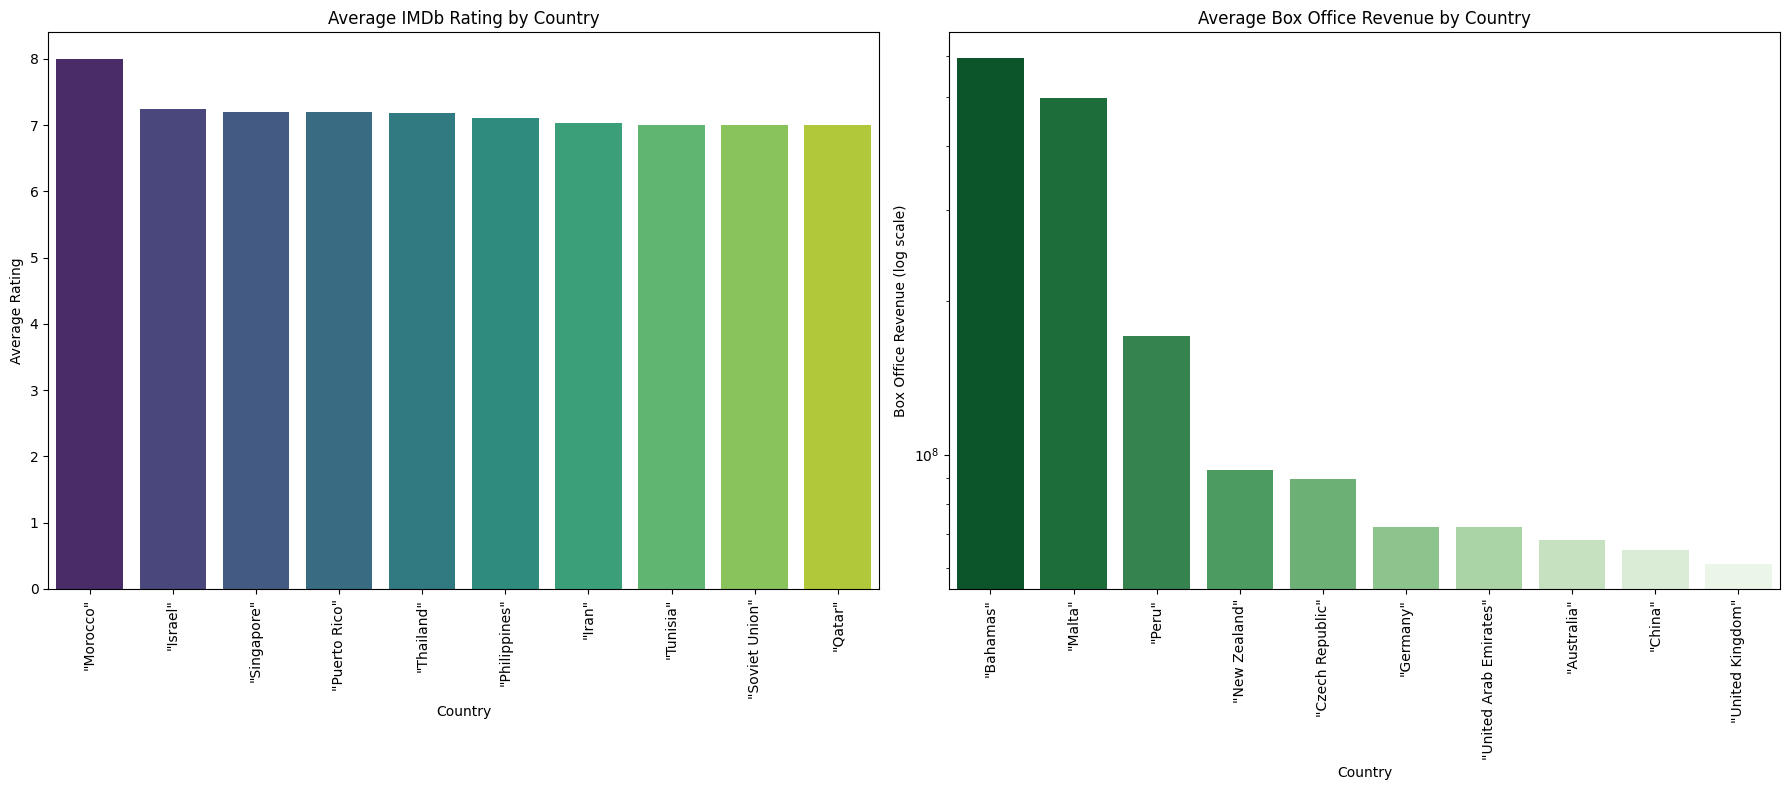

In [166]:
md_countries = md_countries.dropna(subset=['Movie_box_office_revenue'])

country_revenue = md_countries.groupby('Countries').agg({
    'averageRating': 'mean',
    'numVotes': 'mean',
    'Movie_box_office_revenue': 'mean'
})

# Plot 
fig, axs = plt.subplots(1, 2, figsize=(18, 8))
country_revenue = country_revenue.sort_values(by='averageRating', ascending=False)

# Average imdb rating by Language
sns.barplot(x=country_revenue.head(10).index, y=country_revenue.head(10)['averageRating'], ax=axs[0], palette='viridis', hue=country_revenue.head(10).index)    
axs[0].set_title('Average IMDb Rating by Country')
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Average Rating')
axs[0].tick_params(axis='x', rotation=90)  

country_revenue = country_revenue.sort_values(by='Movie_box_office_revenue', ascending=False).head(10)

# Average box office revenue by Language
sns.barplot(x=country_revenue.head(10).index, y=country_revenue.head(10)['Movie_box_office_revenue'], ax=axs[1], palette='Greens_r', hue=country_revenue.head(10).index)
axs[1].set_title('Average Box Office Revenue by Country')
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Box Office Revenue (log scale)')
axs[1].set_yscale('log')
axs[1].tick_params(axis='x', rotation=90)  
plt.tight_layout()
plt.show()

## 1.3 Analysis per Genre

In this third part, we delve into the analysis of movies based on their genres. We start by examining the number of movies produced per genre, identifying the most popular genres over time. This is followed by an analysis of the box office revenue and average ratings for each genre, providing insights into the financial success and audience reception of different types of films. By exploring these aspects, we aim to uncover trends and patterns in genre popularity and success, offering a comprehensive understanding of how genre influences the film industry.

In [106]:
with open(pickle_folder + 'movies_genres_exploded.p', 'rb') as f:
    md_Genres = pickle.load(f)

### 1.3.1 Number of Movies per Genre

The plot of the number of movies per genre highlights that drama, comedy, and romance have a strong foothold in the film industry, while there is also significant production across other genres to meet different audience preferences.

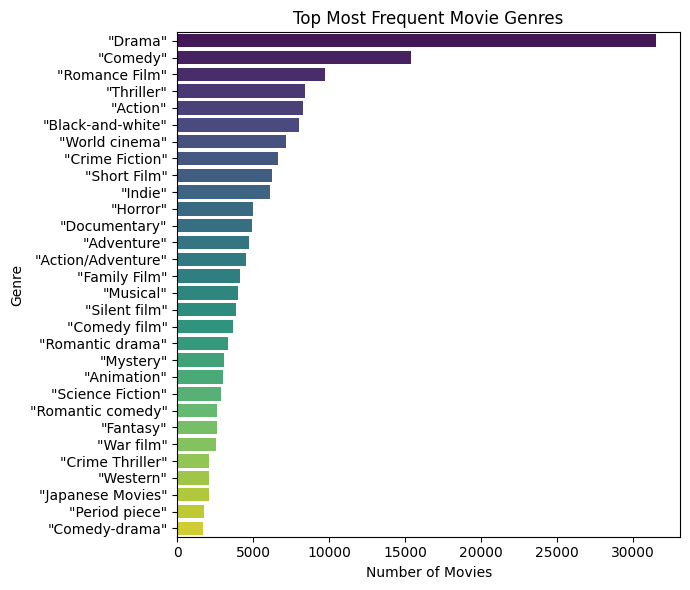

In [107]:
# Select the top 30 genres
top_genres = md_Genres.value_counts('Genres').head(30)

plt.figure(figsize=(7, 6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette="viridis",hue=top_genres.index)
plt.title('Top Most Frequent Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

Analyzing the 10 most frequent Genres in Intervals of 20 Years, we observe that "Drama" has consistently been the dominant genre across all intervals, indicating a stable audience preference for dramatic storytelling over the years. "Comedy" and "Romance Film" also feature prominently in each interval, highlighting their long-standing popularity. However, there are noticeable shifts in other genres; for example, "Black-and-white" films were more common in the earlier intervals (1910-1930 and 1930-1950) but diminish in later years, reflecting the evolution of film technology and color becoming the standard. The presence of genres like "Thriller," "Action," and "World Cinema" increases in the latter half of the 20th century, likely due to globalization and the rise of more diverse storytelling.

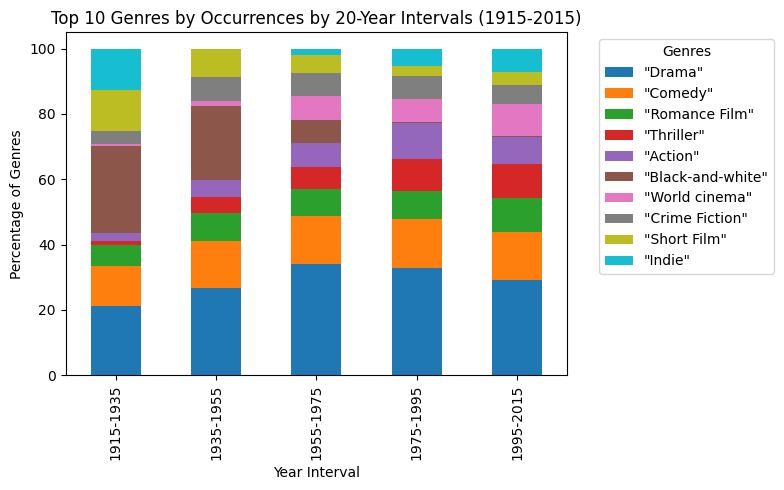

In [108]:
ax = top_n_by_interval('Genres',md_Genres)

### 1.3.2 Box Office Revenue and Average Rating per Genre

Additionally, we analyze the box office revenue and average IMDb ratings for different movie genres to discover insights into the relationship between them, helping us identify trends and patterns.

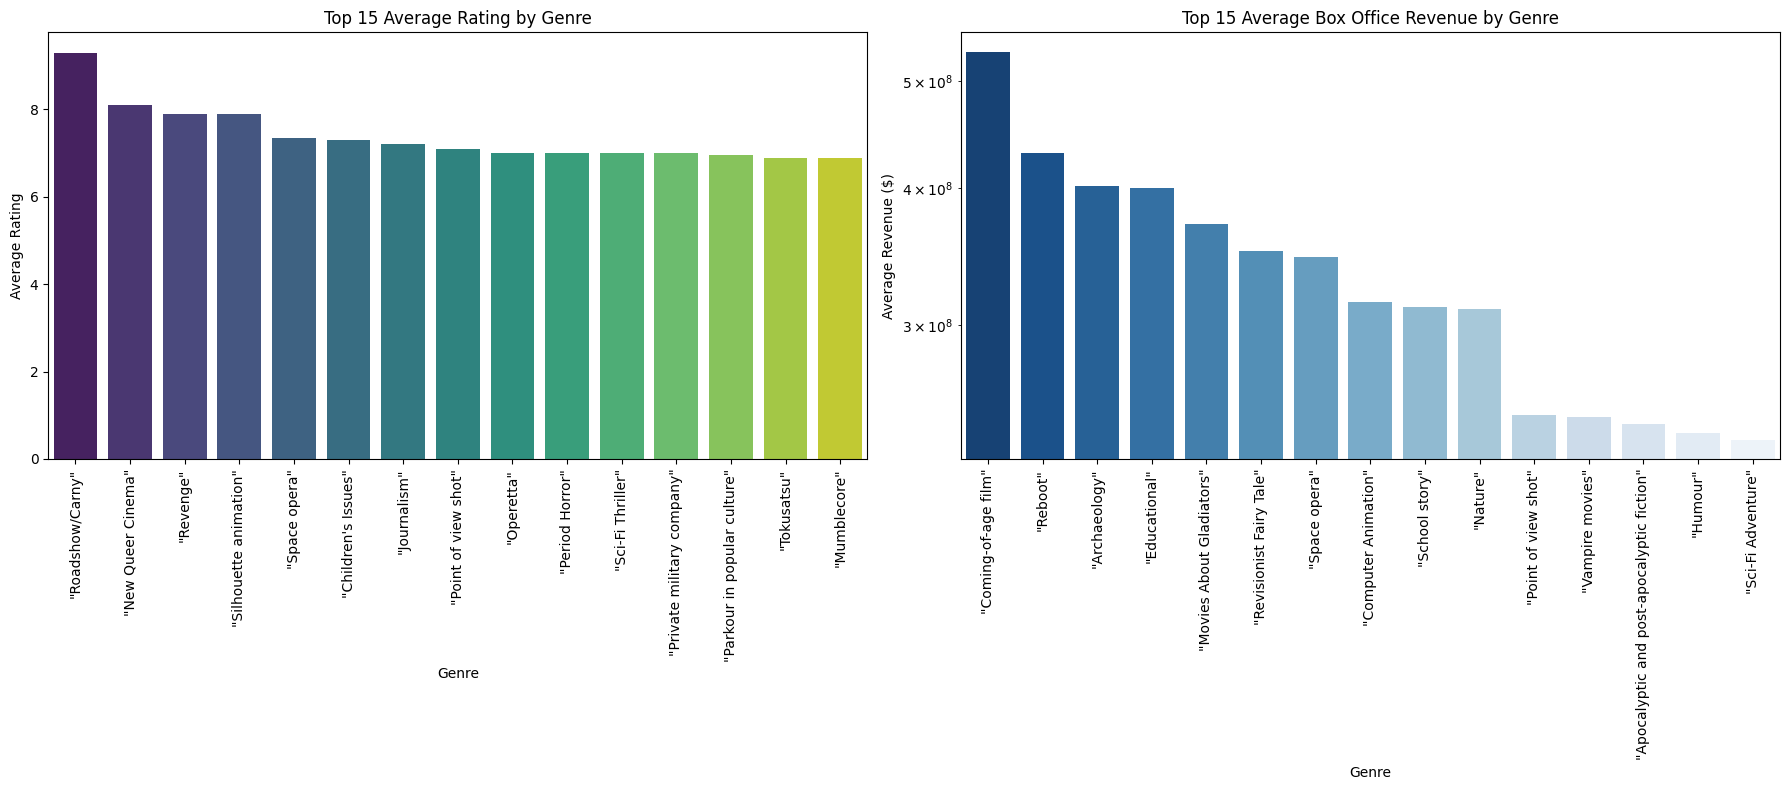

In [109]:
genre_stats = md_Genres.groupby('Genres').agg({
    'averageRating': 'mean',
    'numVotes': 'mean',
    'Movie_box_office_revenue': 'mean'
})

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Average IMDb rating by Genre (Left plot)
genre_stats = genre_stats.sort_values(by='averageRating', ascending=False)
sns.barplot(x=genre_stats.head(15).index, y=genre_stats.head(15)['averageRating'], ax=axs[0], palette='viridis', hue=genre_stats.head(15).index)
axs[0].set_title("Top 15 Average Rating by Genre")
axs[0].set_xlabel("Genre")
axs[0].set_ylabel("Average Rating")
axs[0].tick_params(axis='x', rotation=90)  

# Average box office revenue by Genre (Right plot)
genre_stats = genre_stats.sort_values(by='Movie_box_office_revenue', ascending=False)
sns.barplot(x=genre_stats.head(15).index, y=genre_stats.head(15)['Movie_box_office_revenue'], ax=axs[1], palette='Blues_r', hue=genre_stats.head(15).index)
axs[1].set_title("Top 15 Average Box Office Revenue by Genre")
axs[1].set_xlabel("Genre")
axs[1].set_ylabel("Average Revenue ($)")
axs[1].set_yscale('log')
axs[1].tick_params(axis='x', rotation=90)  

plt.tight_layout()
plt.show()


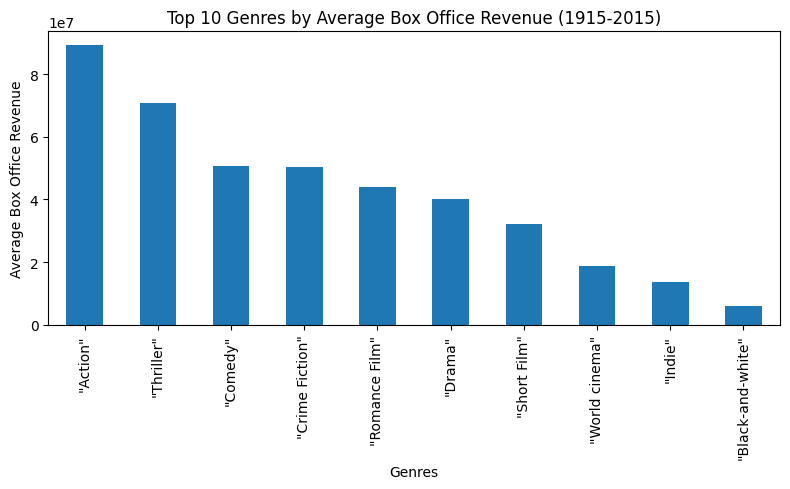

In [110]:
ax = top_n_total_revenue('Genres', md_Genres)

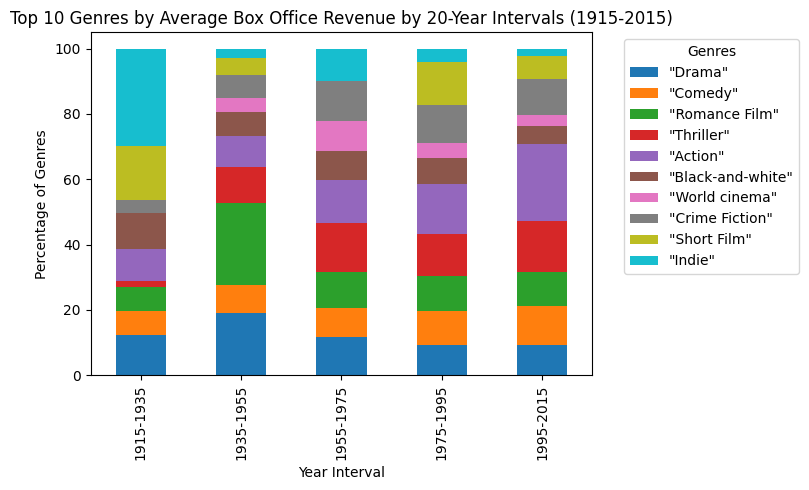

In [111]:
ax = top_n_by_interval('Genres',md_Genres, revenue=True)

## 1.4 Analysis per Release Season

In this section, we examine the impact of the release season on the number of movies produced and their box office revenues. This analysis provides insights into how the strategic timing, like holidays, of a movie's release can affect its performance at the box office.

In [112]:
with open(pickle_folder + 'movies_clean_with_season.p', 'rb') as f:
    movies_season = pickle.load(f)

### 1.4.1 Number of Movies per Release Season

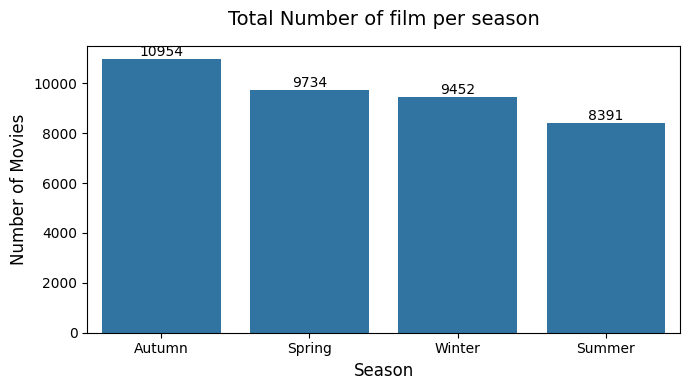

In [113]:
plt.figure(figsize=(7, 4))

yearly_counts = movies_season.value_counts('release_season')

ax = sns.barplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title('Total Number of film per season', fontsize=14, pad=15)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

for i, v in enumerate(yearly_counts.values):
    ax.text(i, v + 1, str(v), 
            ha='center', 
            va='bottom',
            fontsize=10)

plt.tight_layout()

plt.show()

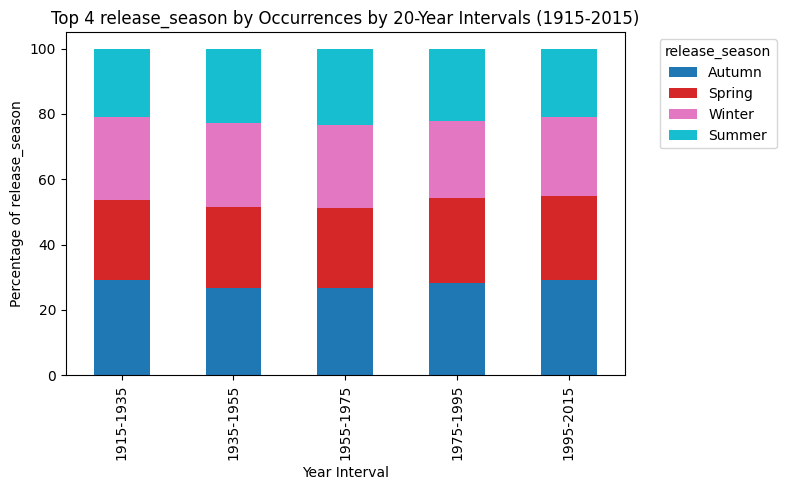

In [114]:
ax = top_n_by_interval('release_season',movies_season,n=4)

### 1.4.2 Box Office Revenue per Release Season

Average Box Office Revenue by Release Season:
release_season
Autumn    4.598434e+07
Winter    4.896139e+07
Spring    5.882097e+07
Summer    7.593201e+07
Name: mean, dtype: float64


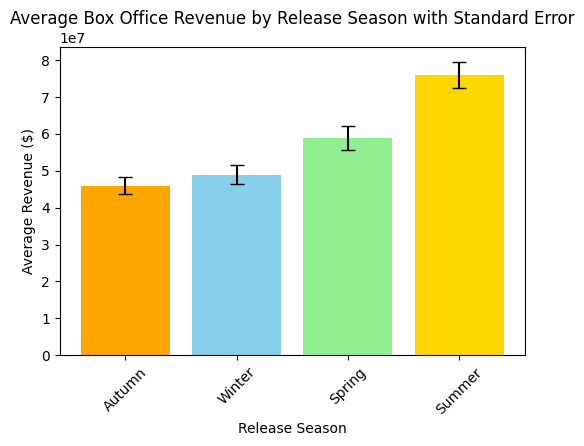

In [115]:
release_season_stats = movies_season.groupby('release_season')['Movie_box_office_revenue'].agg(['mean', 'sem']).sort_values(by='mean')
# Print the average revenues by season
print("Average Box Office Revenue by Release Season:")
print(release_season_stats['mean'])

# Plot the average revenues with standard error bars
plt.figure(figsize=(6, 4))
plt.bar(release_season_stats.index, release_season_stats['mean'], yerr=release_season_stats['sem'], color=['orange', 'skyblue', 'lightgreen', 'gold'], capsize=5)
plt.title('Average Box Office Revenue by Release Season with Standard Error')
plt.xlabel('Release Season')
plt.ylabel('Average Revenue ($)')
plt.xticks(rotation=45)
plt.show()

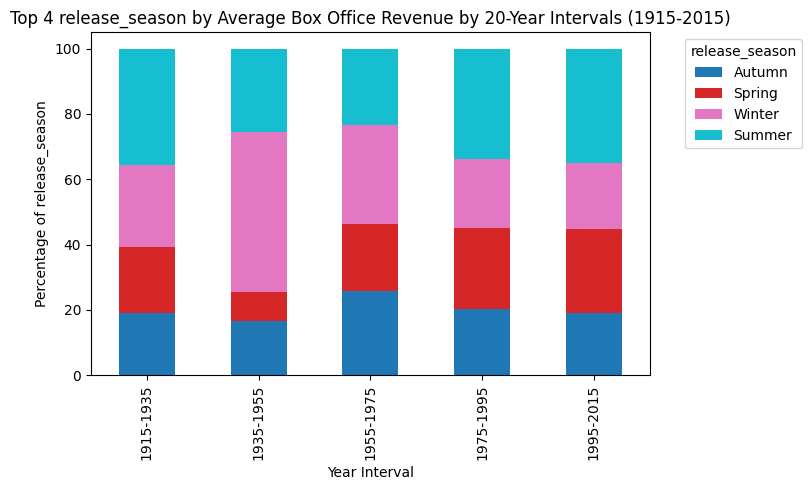

In [116]:
ax = top_n_by_interval('release_season',movies_season,n=4, revenue=True)

## 1.5. Analysis per Language

In [117]:
with open(pickle_folder + 'movies_languages_exploded.p', 'rb') as f:
    movies_languages = pickle.load(f)

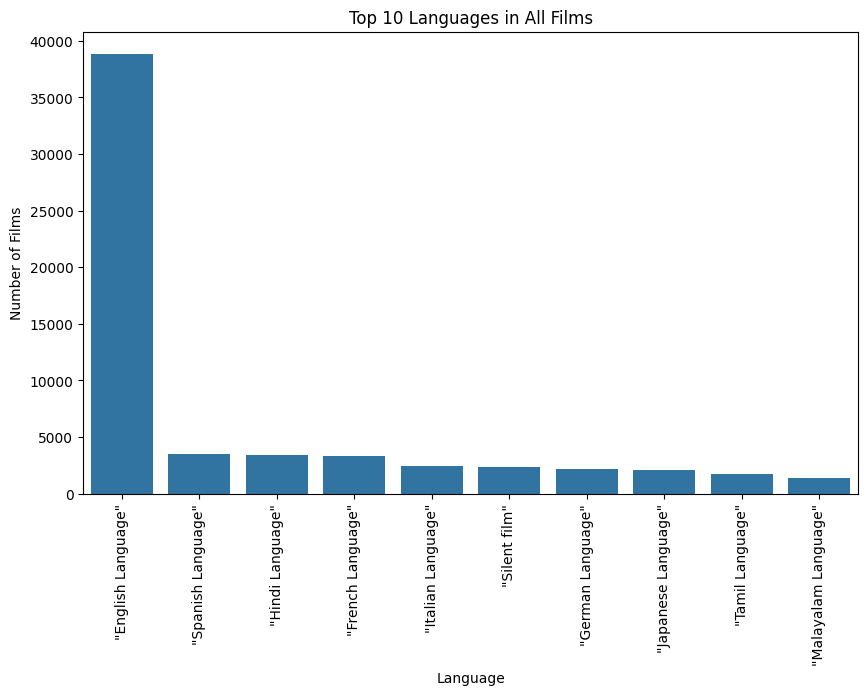

In [118]:
# top 10 languages 
top_languages = movies_languages['Language'].value_counts().head(10)

# Plot 
plt.figure(figsize=(10, 6))
sns.barplot(x=top_languages.index, y=top_languages.values)
plt.title('Top 10 Languages in All Films')
plt.xlabel('Language')
plt.ylabel('Number of Films')
plt.xticks(rotation=90)  
plt.show()

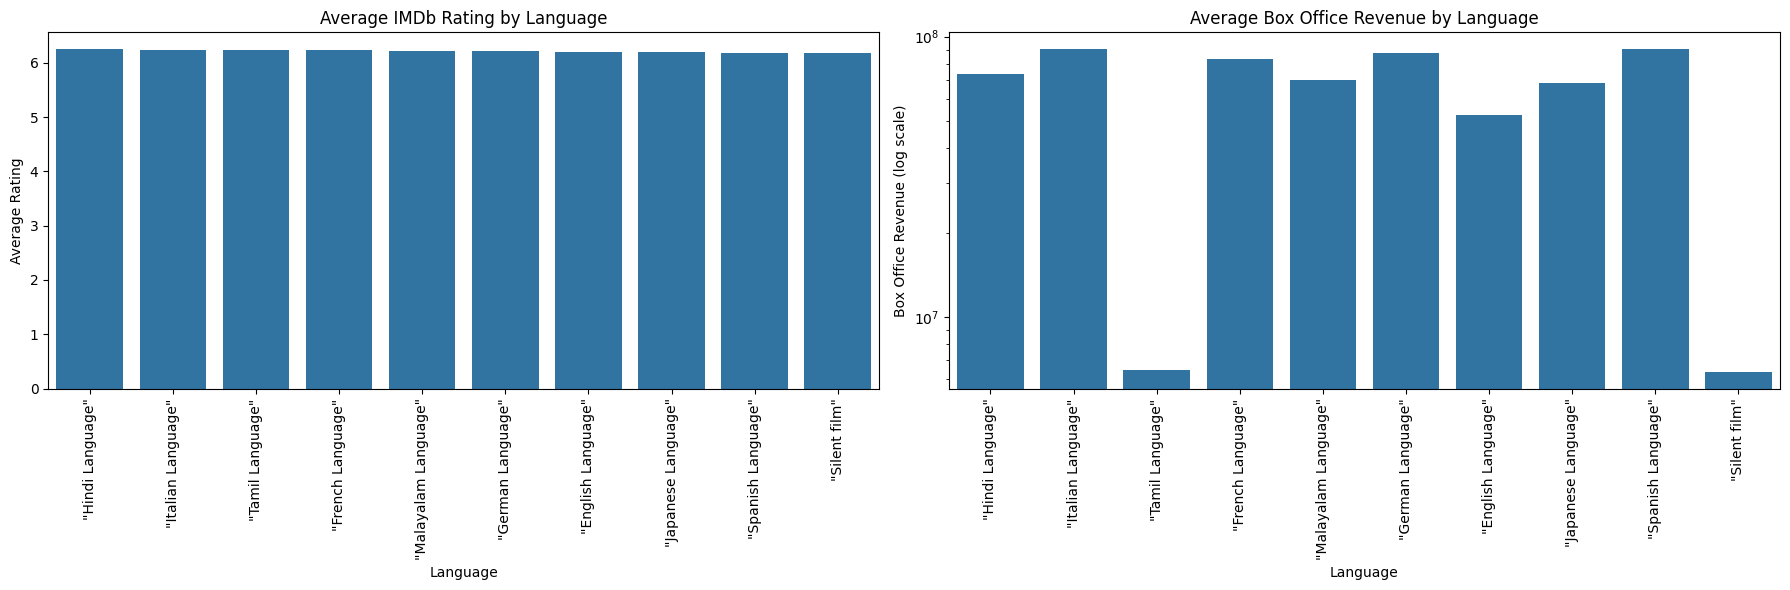

In [119]:
top_language_data = movies_languages[movies_languages['Language'].isin(top_languages.index)]

language_success = top_language_data.groupby('Language').agg({
    'averageRating': 'mean',
    'numVotes': 'mean',
    'Movie_box_office_revenue': 'mean'
}).sort_values(by='averageRating', ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Average imdb rating by Language
sns.barplot(x=language_success.index, y=language_success['averageRating'], ax=axs[0])
axs[0].set_title('Average IMDb Rating by Language')
axs[0].set_xlabel('Language')
axs[0].set_ylabel('Average Rating')
axs[0].tick_params(axis='x', rotation=90)  

# Average box office revenue by Language
sns.barplot(x=language_success.index, y=language_success['Movie_box_office_revenue'], ax=axs[1])
axs[1].set_title('Average Box Office Revenue by Language')
axs[1].set_xlabel('Language')
axs[1].set_ylabel('Box Office Revenue (log scale)')
axs[1].set_yscale('log')
axs[1].tick_params(axis='x', rotation=90)  

plt.tight_layout()
plt.show()

## 1.6. Analysis of the Age of Actors

### 1.6.1 Number of Actors per Age

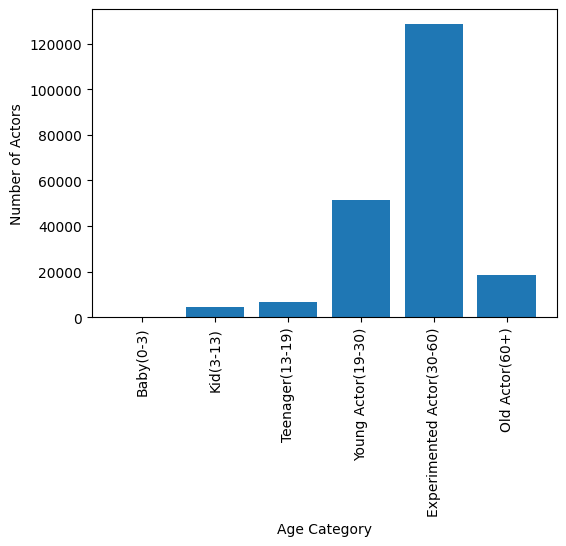

In [143]:
cd_age = character_data.copy()
order=['Baby(0-3)', 'Kid(3-13)', 'Teenager(13-19)', 'Young Actor(19-30)', 'Experimented Actor(30-60)', 'Old Actor(60+)']
number_of_actors = cd_age['Age_Interval'].value_counts()[order]

plt.figure(figsize=(6, 4))
plt.bar(number_of_actors.index, number_of_actors.values)
plt.xlabel('Age Category')
plt.ylabel('Number of Actors')
plt.xticks(rotation=90)
plt.show()

### 1.6.2 Box Office Revenue and Average Rating per Age

Text(0.5, 1.0, 'Contribution of each Age category to the Box office')

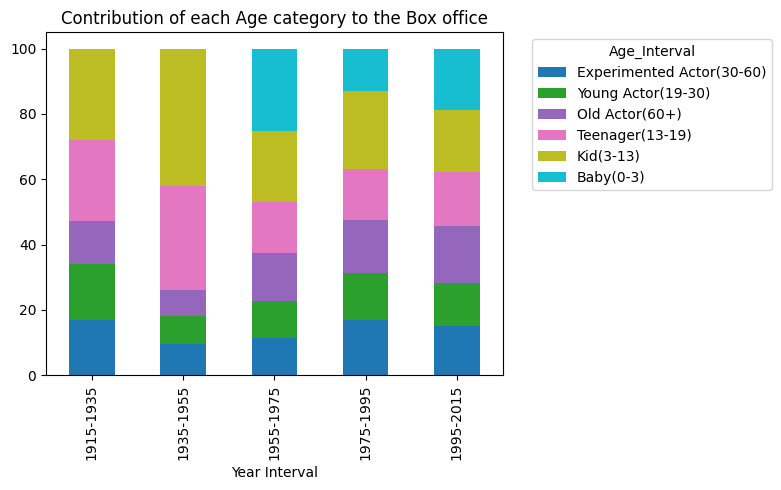

In [151]:
ax = top_n_by_interval('Age_Interval',cd_age,n=6, revenue=True)
ax.set_title("Contribution of each Age category to the Box office")

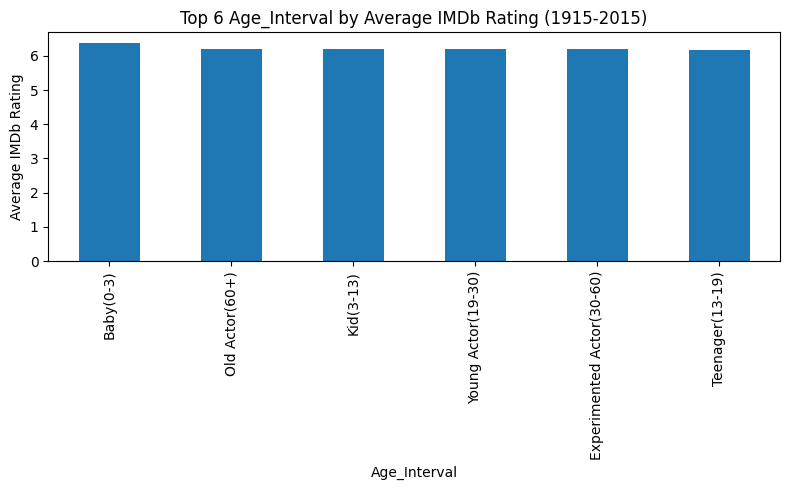

In [172]:
ax = top_n_average_rating('Age_Interval',cd_age,n=6)

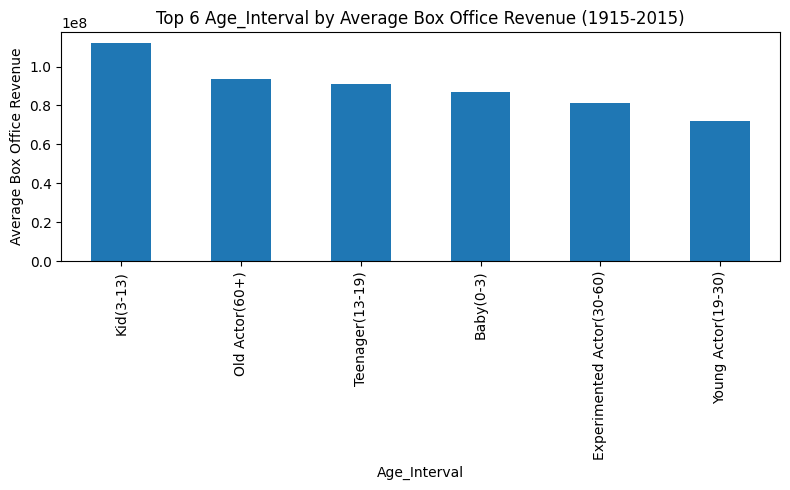

In [173]:
ax = top_n_total_revenue('Age_Interval',cd_age,n=6)

## 1.7. Analysis of the Age of Actors

### 1.7.1 Number of Actors per Age

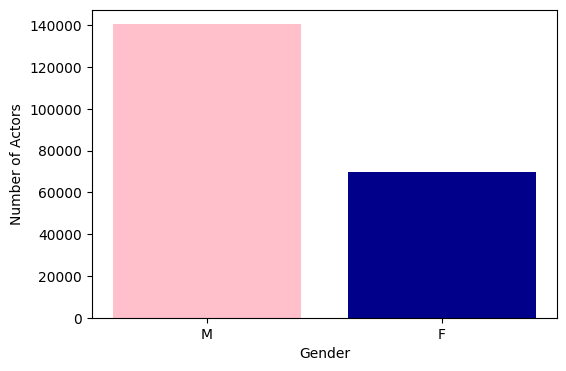

In [135]:
cd_gender = character_data.copy()
number_of_actors = cd_number['Actor_gender'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(number_of_actors.index, number_of_actors.values, color=['pink','darkblue'])
plt.xlabel('Gender')
plt.ylabel('Number of Actors')
plt.show()

### 1.7.2 Box Office Revenue and Average Rating per Gender

Text(0.5, 1.0, 'Contribution of each Gender to the Box office')

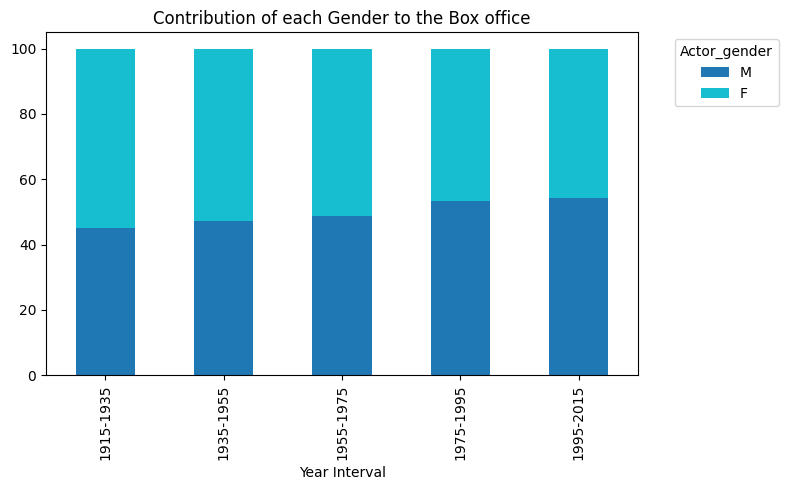

In [175]:
ax = top_n_by_interval('Actor_gender',cd_age,n=2, revenue=True)
ax.set_title("Contribution of each Gender to the Box office")

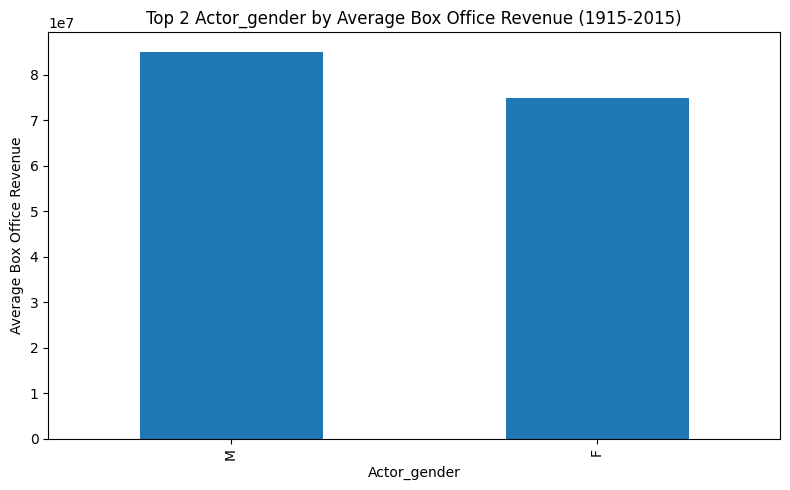

In [178]:
ax = top_n_total_revenue('Actor_gender',cd_age,n=2)

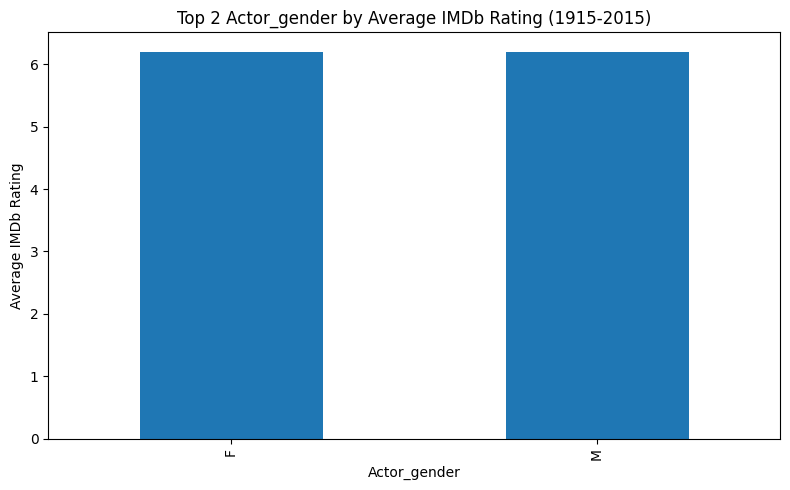

In [179]:
ax = top_n_average_rating('Actor_gender',cd_age,n=2)